In [1]:
-

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


[[ 0.71312088  0.95656093]
 [ 0.56944766  0.98210048]
 [ 0.70778169  0.95014964]]
Reference std: 0.707106781187


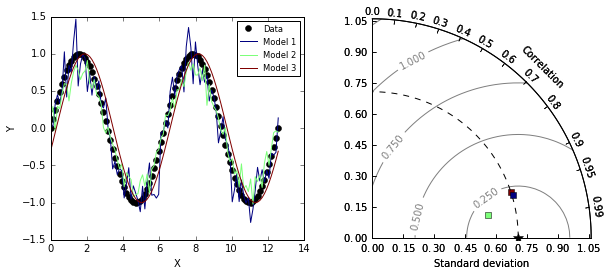

In [3]:
if __name__=='__main__':

    # Reference dataset
    x = NP.linspace(0,4*NP.pi,100)
    data = NP.sin(x)
    refstd = data.std(ddof=1)           # Reference standard deviation

    # Models
    m1 = data + 0.2*NP.random.randn(len(x))    # Model 1
    m2 = 0.8*data + .1*NP.random.randn(len(x)) # Model 2
    m3 = NP.sin(x-NP.pi/10)                    # Model 3

    # Compute stddev and correlation coefficient of models
    samples = NP.array([ [m.std(ddof=1), NP.corrcoef(data, m)[0,1]]
                         for m in (m1,m2,m3)])
    print(samples)
    fig = PLT.figure(figsize=(10,4))
    
    ax1 = fig.add_subplot(1,2,1, xlabel='X', ylabel='Y')
    # Taylor diagram
    dia = TaylorDiagram(refstd, fig=fig, rect=122, label="Reference")

    colors = PLT.matplotlib.cm.jet(NP.linspace(0,1,len(samples)))

    ax1.plot(x,data,'ko', label='Data')
    for i,m in enumerate([m1,m2,m3]):
        ax1.plot(x,m, c=colors[i], label='Model %d' % (i+1))
    ax1.legend(numpoints=1, prop=dict(size='small'), loc='best')

    # Add samples to Taylor diagram
    for i,(stddev,corrcoef) in enumerate(samples):
        dia.add_sample(stddev, corrcoef, marker='s', ls='', c=colors[i],
                       label="Model %d" % (i+1))

    # Add RMS contours, and label them
    contours = dia.add_contours(colors='0.5')
    PLT.clabel(contours, inline=1, fontsize=10)